# Incluindo os nomes

Estamos usando o JSON do IBGE para ver os nomes mais usados do brasil.

Iremos consumir 2 JSON, com nome masculino e feminino. 

In [1]:
import pandas as pd

In [2]:
meninos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
meninos

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [3]:
meninas = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
meninas

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
print("Quantidade de nomes: " + str(len(meninos) + len(meninas)) )

Quantidade de nomes: 400


In [5]:
frames = [meninas,meninos]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
70,JOAQUIM
109,GEOVANA
159,SELMA
135,RUBENS
22,ANDRE


## Incluindo ID dos alunos

In [7]:
import numpy as np
np.random.seed(123)

In [8]:
total_alunos = len(nomes)
total_alunos

400

In [9]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [10]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [11]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [12]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


Lemos um json com a função `read_json()` para buscar os nomes das alunas e alunos

Juntamos os nomes masculinos e femininos com a função `concat()` e transformamos em um novo DataFrame com o comando `to_frame()`

Inserimos um `id` para identificar melhor cada pessoa

# Criando a tabela Cursos

In [13]:
!pip3 install html5lib
!pip3 install lxml

In [14]:
import html5lib

In [15]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [16]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [17]:
type(cursos)

list

In [18]:
#cursos é uma lista e colocando 'curso[0]' faz com que ele retorne uma tabela do pandas
cursos = cursos[0]

In [19]:
type(cursos)

pandas.core.frame.DataFrame

In [20]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index e o nome da coluna 'nome de cursos'

In [21]:
cursos.rename(columns={'Nome do curso':'nome_do_curso'}, inplace=True)
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [22]:
cursos['id'] = cursos.index + 1

In [23]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [24]:
cursos.set_index('id', inplace = True)

In [25]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


Lemos uma tabela de uma página html com a função `read_html()`, passando a url como parâmetro para buscar os nomes dos cursos

Transformamos o retorno dessa função em um DataFrame com o código `cursos = cursos[0]`

Criamos um ID para cada curso e setamos o index para ser o id com o código `cursos = cursos.set_index('id')`

## Matriculando os alunos nos cursos

In [26]:
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com
76,TATIANE,203,@servicodoemail.com,tatiane@servicodoemail.com
65,MAURICIO,395,@servicodoemail.com,mauricio@servicodoemail.com
52,SAMUEL,220,@dominiodoemail.com.br,samuel@dominiodoemail.com.br
187,ELTON,97,@dominiodoemail.com.br,elton@dominiodoemail.com.br


In [27]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [28]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,2
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,3
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3


In [29]:
nomes.matriculas.describe()

count    400.000000
mean       2.017500
std        1.422058
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [30]:
import seaborn as sns

<AxesSubplot:xlabel='matriculas', ylabel='Count'>

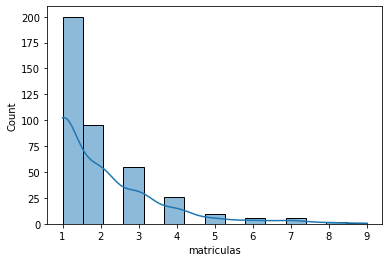

In [31]:
sns.histplot(nomes.matriculas,kde=True)

In [32]:
nomes.matriculas.value_counts()

1    200
2     95
3     55
4     26
5      9
6      6
7      6
8      2
9      1
Name: matriculas, dtype: int64

# Selecionando cursos

Criamos uma nova coluna no DataFrame `nomes` chamada matriculas para representar quantos cursos cada pessoa está matriculada

Geramos um novo DataFrame `matriculas` para representar qual curso cada aluno está matriculado

Fizemos um `join` dos DataFrames `matriculas` e `cursos` para exibir a quantidade de alunos em cada curso

Vimos como ler e escrever um DataFrame em diferentes tipos: csv, json e html

In [33]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@servicodoemail.com,clara@servicodoemail.com,3
64,ROBSON,290,@servicodoemail.com,robson@servicodoemail.com,2
13,DANIEL,195,@servicodoemail.com,daniel@servicodoemail.com,4
98,GILSON,134,@dominiodoemail.com.br,gilson@dominiodoemail.com.br,1
33,NATALIA,192,@dominiodoemail.com.br,natalia@dominiodoemail.com.br,1


In [34]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [35]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id,np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno','id_curso'])

In [36]:
matriculas.head()

,id_aluno,id_curso
0,235,13
1,43,6
2,43,2
3,304,5
4,156,13


In [37]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(
    cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails
5,64,Cursos de Python
6,32,PHP com MySql


# Saída em diferentes formatos

Lemos uma tabela de uma página html com a função `read_html()`, passando a url como parâmetro para buscar os nomes dos cursos

Transformamos o retorno dessa função em um DataFrame com `cursos = cursos[0]`

Criamos um ID para cada curso e setamos o index para ser o id `cursos = cursos.set_index('id')`

In [38]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails


In [39]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [40]:
matriculas_json = matriculas_por_curso.to_json()

In [41]:
matriculas_json

'{"quantidade_de_alunos":{"2":39,"3":18,"4":6,"5":64,"6":32,"7":18,"8":114,"9":26,"10":7,"11":49,"12":86,"13":88,"14":13,"15":42,"16":22,"17":100,"18":26,"19":18,"20":39},"nome_do_curso":{"2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [42]:
matriculas_html = matriculas_por_curso.to_html()

In [43]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>39</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>18</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>64</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>18</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>114</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>26</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>7</td>
      <td

# SQL

prendemos como utilizar o pandas para ler e escrever em um banco sql

Utilizamos o banco SQLite que vem com o pandas e criamos um banco local

Salvamos o DataFrame de matriculas com o comando `matriculas_por_curso.to_sql('matriculas', engine)`

Lemos uma tabela do banco com a função `read_sql_table()` e exibimos o resultado de uma query com o comando `read_sql()`, passando a query como parâmetro

In [44]:
!pip3 install sqlalchemy

In [45]:
from sqlalchemy import create_engine, MetaData, Table, inspect 

In [46]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [47]:
type(engine)

sqlalchemy.engine.base.Engine

In [48]:
matriculas_por_curso.to_sql('matriculas', engine)

In [49]:
inspector = inspect(engine) # criando um Inspector object

In [50]:
print(inspector.get_table_names())

['matriculas']


In [51]:
print(inspector.get_columns('matriculas'))

[{'name': 'id_curso', 'type': BIGINT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'quantidade_de_alunos', 'type': BIGINT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'nome_do_curso', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [52]:
## Buscando do banco sql

In [53]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [54]:
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,18,C# para Web
1,4,6,Ruby on Rails
2,7,18,.NET para web
3,10,7,Código limpo com C#
4,14,13,Desenvolvendo jogos
5,19,18,Boas práticas em Java


In [55]:
pd.read_sql_table('matriculas',engine,columns=['quantidade_de_alunos','nome_do_curso'])

,quantidade_de_alunos,nome_do_curso
0,39,Java para Web
1,18,C# para Web
2,6,Ruby on Rails
3,64,Cursos de Python
4,32,PHP com MySql
5,18,.NET para web
6,114,Novas integrações com Java
7,26,TDD com Java
8,7,Código limpo com C#
9,49,Preparatório para certificação Java


In [56]:
muitas_matriculas = pd.read_sql_table('matriculas',engine,columns=
                                      ['quantidade_de_alunos','nome_do_curso'])

muitas_matriculas

,quantidade_de_alunos,nome_do_curso
0,39,Java para Web
1,18,C# para Web
2,6,Ruby on Rails
3,64,Cursos de Python
4,32,PHP com MySql
5,18,.NET para web
6,114,Novas integrações com Java
7,26,TDD com Java
8,7,Código limpo com C#
9,49,Preparatório para certificação Java


In [57]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80 ')
muitas_matriculas

,quantidade_de_alunos,nome_do_curso
6,114,Novas integrações com Java
10,86,Hardware básico
11,88,Persistência com .NET
15,100,Internet das coisas


In [58]:
# Escrevendo no banco

In [59]:
muitas_matriculas.to_sql('muitas_matriculas',con=engine)

In [60]:
inspector = inspect(engine)

In [61]:
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [62]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
2,39,Java para Web
3,18,C# para Web
4,6,Ruby on Rails
5,64,Cursos de Python
6,32,PHP com MySql


In [63]:
id_curso = 2
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
2,43,2
89,268,2
110,241,2
113,391,2
115,27,2
130,83,2
132,83,2
142,122,2
249,106,2
261,79,2


In [64]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
8,LUIZ,208,@servicodoemail.com,luiz@servicodoemail.com,7
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,4
109,CELSO,266,@servicodoemail.com,celso@servicodoemail.com,4


In [65]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
5,2,SEVERINA,@servicodoemail.com,severina@servicodoemail.com,2
24,2,JOAO,@dominiodoemail.com.br,joao@dominiodoemail.com.br,2
27,2,RAFAELA,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
43,2,ANA,@servicodoemail.com,ana@servicodoemail.com,2
61,2,DIOGO,@servicodoemail.com,diogo@servicodoemail.com,8
79,2,TAINA,@dominiodoemail.com.br,taina@dominiodoemail.com.br,1
83,2,ISABEL,@dominiodoemail.com.br,isabel@dominiodoemail.com.br,4
83,2,ISABEL,@dominiodoemail.com.br,isabel@dominiodoemail.com.br,4
84,2,KAUAN,@servicodoemail.com,kauan@servicodoemail.com,1


In [66]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
5      SEVERINA
24         JOAO
27      RAFAELA
43          ANA
61        DIOGO
79        TAINA
83       ISABEL
83       ISABEL
84        KAUAN
86      GUSTAVO
91       LORENA
98     JEFERSON
104      MILTON
106       LIVIA
122    PRISCILA
140      WAGNER
144     CECILIA
159     ORLANDO
176     GIOVANA
181      MOACIR
199       ARTUR
207       DAVID
214       JAIME
215      WESLEI
216      VICTOR
223     CLEITON
231      WALTER
241       LUCIA
257     ADILSON
266       CELSO
268     MARLENE
294       DIEGO
301      MAIARA
325       NEIDE
344        JAIR
346      LURDES
366     GEOVANE
374     JULIANO
391      RAQUEL
Name: nome, dtype: object

In [67]:
proxima_turma = proxima_turma.set_index('id_aluno').join(
                        nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
5,SEVERINA
24,JOAO
27,RAFAELA
43,ANA
61,DIOGO
79,TAINA
83,ISABEL
83,ISABEL
84,KAUAN


In [68]:
nome_curso = cursos.loc[id_curso] #id_curso está declarado mais acima
nome_curso

nome_do_curso    Java para Web
Name: 2, dtype: object

In [69]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Java para Web'

In [70]:
proxima_turma = proxima_turma.rename(columns={'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma.head()

,Alunos do curso de Java para Web
id_aluno,
5,SEVERINA
24,JOAO
27,RAFAELA
43,ANA
61,DIOGO


# Excel

Escolhemos um curso e selecionamos todas as pessoas matriculadas nele

Exportamos o DataFrame para o tipo excel com o comando `proxima_turma.to_excel('proxima_turma.xlsx', index=False)`

Para verificar se o DataFrame estava certo, lemos o arquivo excel com o comando `pd.read_excel('proxima_turma.xlsx')`

In [71]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [72]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Java para Web
0,SEVERINA
1,JOAO
2,RAFAELA
3,ANA
4,DIOGO
5,TAINA
6,ISABEL
7,ISABEL
8,KAUAN
9,GUSTAVO
